In [22]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import seaborn as sns
warnings.filterwarnings("ignore")

#independent variable
x = np.array([i*np.pi/180 for i in range(0,310,3)]) #angles from 10 to 360 in degrees
np.random.seed(10) 
#target variable based on sinus model
y = np.sin(x) + np.random.normal(0,0.2,len(x))
#form data frame
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
#Printing first 5 rows of the data
data.head()

,x,y
0,0,0.27
1,0.052,0.2
2,0.1,-0.2
3,0.16,0.15
4,0.21,0.33


Text(0, 0.5, 'y')

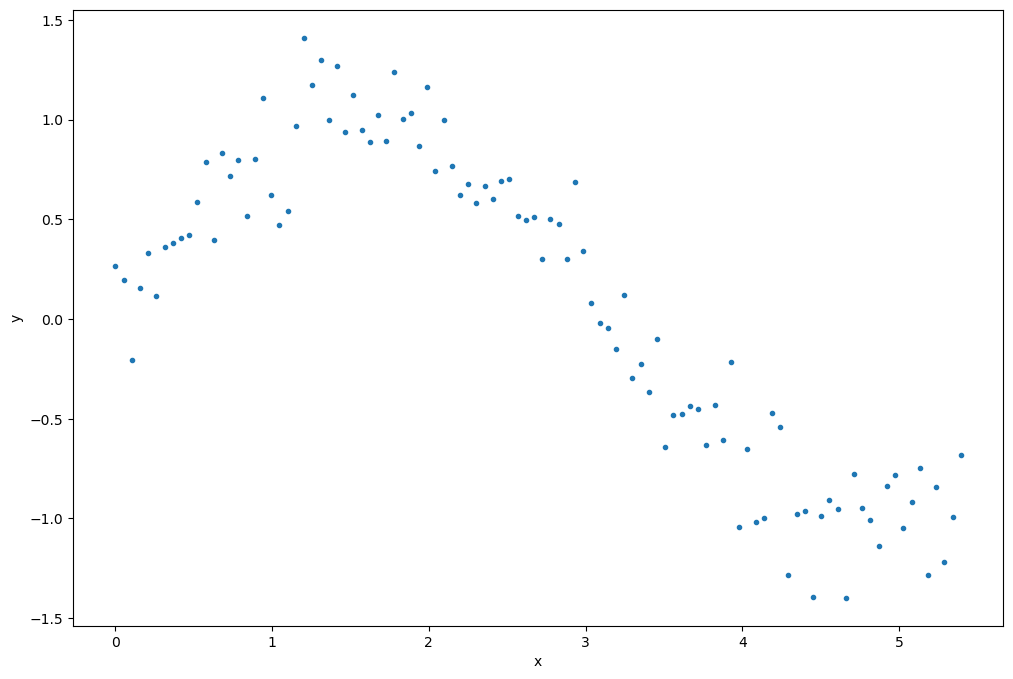

In [23]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
# polynomial regression with powers of x from 2 to 15
for i in range(2,16):  #power of 1 is already there, starting with 2
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
data.head(117)

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0,0.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.052,0.2,0.0027,0.00014,7.5e-06,3.9e-07,2.1e-08,1.1e-09,5.6e-11,3e-12,1.5e-13,8.1e-15,4.2e-16,2.2e-17,1.2e-18,6.1e-20
2,0.1,-0.2,0.011,0.0011,0.00012,1.3e-05,1.3e-06,1.4e-07,1.4e-08,1.5e-09,1.6e-10,1.7e-11,1.7e-12,1.8e-13,1.9e-14,2e-15
3,0.16,0.15,0.025,0.0039,0.00061,9.6e-05,1.5e-05,2.4e-06,3.7e-07,5.8e-08,9.1e-09,1.4e-09,2.3e-10,3.5e-11,5.6e-12,8.7e-13
4,0.21,0.33,0.044,0.0092,0.0019,0.0004,8.4e-05,1.8e-05,3.7e-06,7.8e-07,1.6e-07,3.4e-08,7.1e-09,1.5e-09,3.1e-10,6.5e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,5.2,-1.3,27,1.4e+02,7.2e+02,3.7e+03,1.9e+04,1e+05,5.2e+05,2.7e+06,1.4e+07,7.3e+07,3.8e+08,2e+09,1e+10,5.2e+10
100,5.2,-0.84,27,1.4e+02,7.5e+02,3.9e+03,2.1e+04,1.1e+05,5.6e+05,3e+06,1.5e+07,8.1e+07,4.2e+08,2.2e+09,1.2e+10,6.1e+10
101,5.3,-1.2,28,1.5e+02,7.8e+02,4.1e+03,2.2e+04,1.2e+05,6.1e+05,3.2e+06,1.7e+07,9e+07,4.8e+08,2.5e+09,1.3e+10,7.1e+10
102,5.3,-0.99,29,1.5e+02,8.1e+02,4.3e+03,2.3e+04,1.2e+05,6.6e+05,3.5e+06,1.9e+07,1e+08,5.4e+08,2.9e+09,1.5e+10,8.2e+10


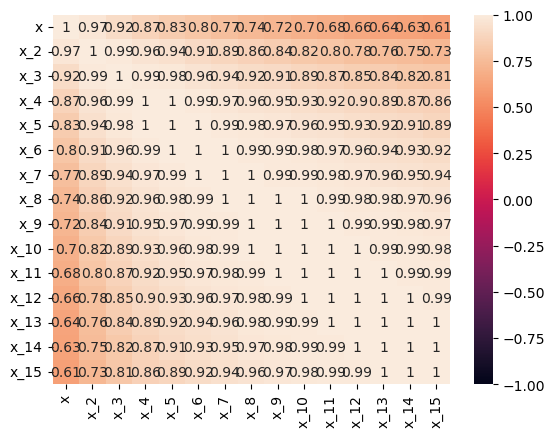

In [25]:
X_df= data.drop('y', axis=1)
y_df=data['y']
X_train, X_valid, y_train, y_valid=train_test_split(X_df,y_df,test_size=0.3)
X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_valid = X_valid.sort_index()
y_valid = y_valid.sort_index()
sns.heatmap(X_train.corr().round(2),annot=True,vmin=-1, vmax=1);

## Simple Linear Regression with one feature

In [26]:


independent_variable_train = X_train['x'].values.reshape(-1, 1)

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train.values)
y_train_pred = linreg.predict(independent_variable_train)

error_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_valid = X_valid['x'].values.reshape(-1,1)
y_valid_pred = linreg.predict(independent_variable_valid)
error_test = sum((y_valid_pred-y_valid)**2)/ X_valid.shape[0]

print("Training Error", error_train)
print("Testing Error",error_test)

Training Error 0.2267114776765077
Testing Error 0.16793586872677732


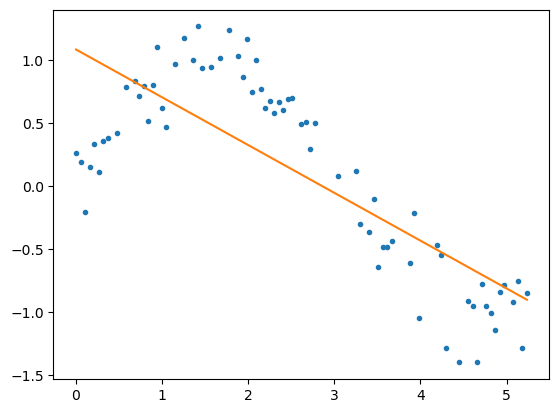

In [27]:
plt.plot(X_train['x'],y_train,'.')
plt.plot(X_train['x'],y_train_pred)

## Multiple Linear Regression with three features

In [28]:

independent_variable_train = X_train[['x','x_2','x_3']].values

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train.values)
y_train_pred = linreg.predict(independent_variable_train)

error_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_valid = X_valid[['x','x_2','x_3']].values
y_valid_pred = linreg.predict(independent_variable_valid)
error_valid = sum((y_valid_pred-y_valid)**2)/ X_valid.shape[0]

print("Training Error", error_train)
print("Testing Error",error_valid)

Training Error 0.042006540046890535
Testing Error 0.0392032373474709


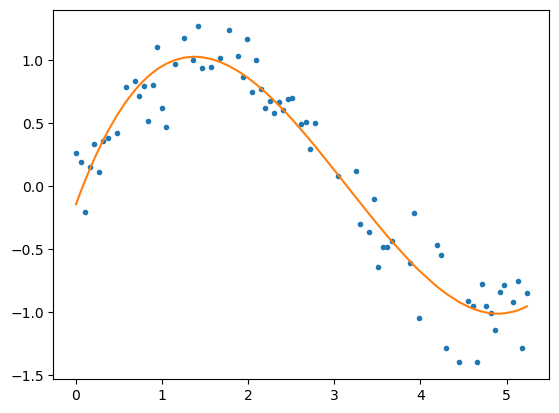

In [29]:
plt.plot(X_train['x'],y_train,'.')
plt.plot(X_train['x'],y_train_pred)

In [30]:
linreg.coef_

array([ 1.87767834, -0.87448146,  0.09288725])

## Multiple regression with all features included

In [31]:

independent_variable_train = X_train[X_train.columns[0:15]].values

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train.values)
y_train_pred = linreg.predict(independent_variable_train)

error_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_valid = X_valid[X_valid.columns[0:15]].values
y_valid_pred = linreg.predict(independent_variable_valid)
error_test = sum((y_valid_pred-y_valid)**2)/ X_valid.shape[0]

print("Training Error", error_train)
print("Testing Error",error_test)

Training Error 0.03206661518137697
Testing Error 0.3326575210237167


In [32]:
linreg.coef_

array([-5.02426081e+00,  3.48569392e+01, -9.21258817e+01,  1.54752076e+02,
       -2.06575295e+02,  2.27915976e+02, -1.93037681e+02,  1.18428410e+02,
       -5.15471209e+01,  1.58086495e+01, -3.38191851e+00,  4.92897329e-01,
       -4.65698259e-02,  2.56705881e-03, -6.25464453e-05])

In [33]:
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [34]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [35]:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

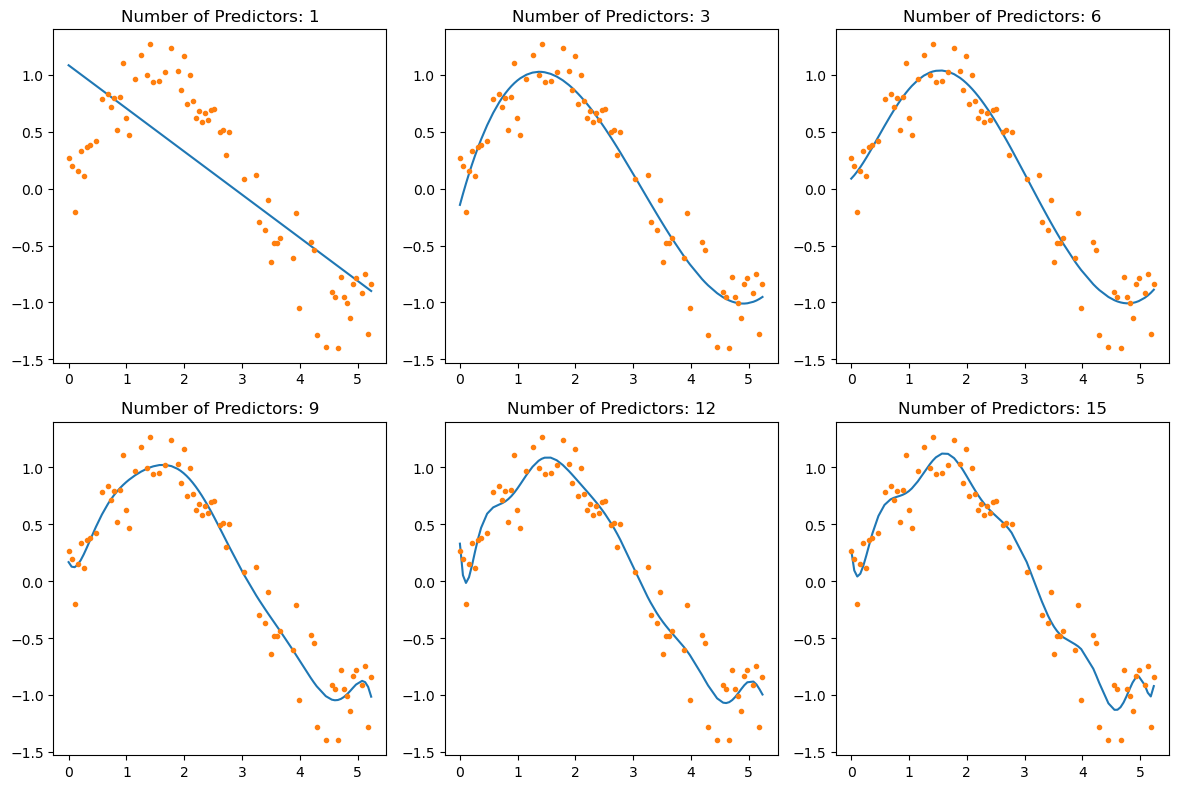

In [36]:
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train.values[:,0:i]
    train_y = y_train
    test_x = X_valid.values[:,0:i]
    test_y = y_valid
    
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [37]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.23,0.17,1.1,-0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.11,0.16,0.42,0.42,-0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.042,0.039,-0.14,1.9,-0.87,0.093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.039,0.04,-0.019,1.3,-0.39,-0.053,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.038,0.036,0.06,0.79,0.38,-0.46,0.1,-0.0068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.038,0.036,0.088,0.52,0.92,-0.88,0.25,-0.032,0.0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.038,0.035,0.12,0.14,2,-2,0.86,-0.2,0.025,-0.0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.038,0.036,0.094,0.53,0.55,0.053,-0.66,0.41,-0.11,0.015,-0.00077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.036,0.073,0.17,-1.2,8.7,-15,14,-7.9,2.6,-0.49,0.051,-0.0022,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.036,0.058,0.18,-1.7,12,-23,23,-14,5.3,-1.2,0.17,-0.013,0.0004,NaN,NaN,NaN,NaN,NaN


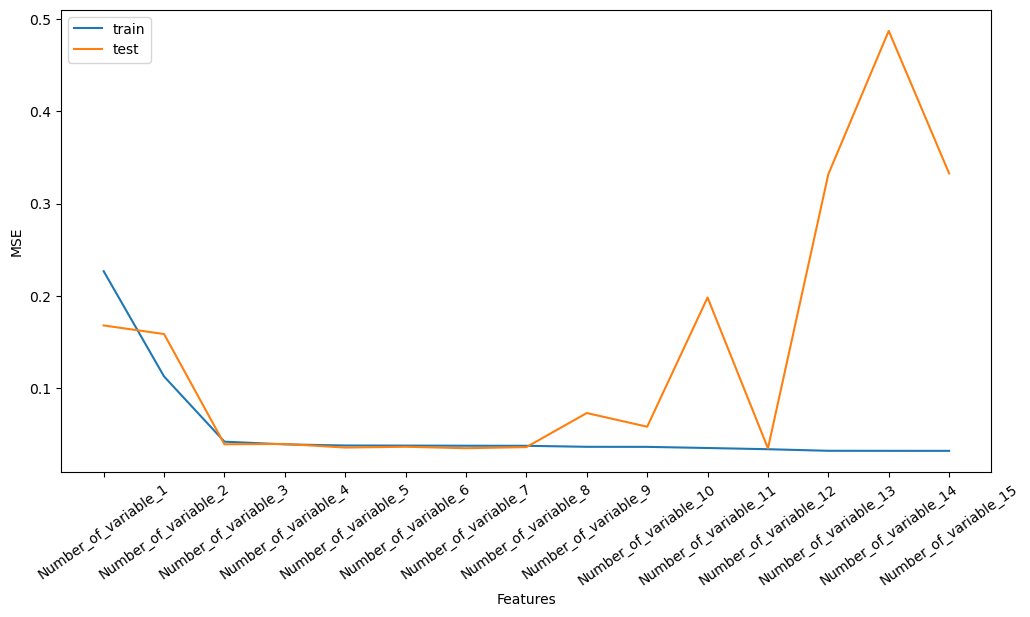

In [38]:
plt.figure(figsize=(12,6))
plt.plot(coef_matrix_simple['mrss_train'])
plt.plot(coef_matrix_simple['mrss_test'])
plt.xlabel('Features')
plt.ylabel('MSE')
plt.legend(['train', 'test'])
plt.xticks(rotation = 35)
plt.show();

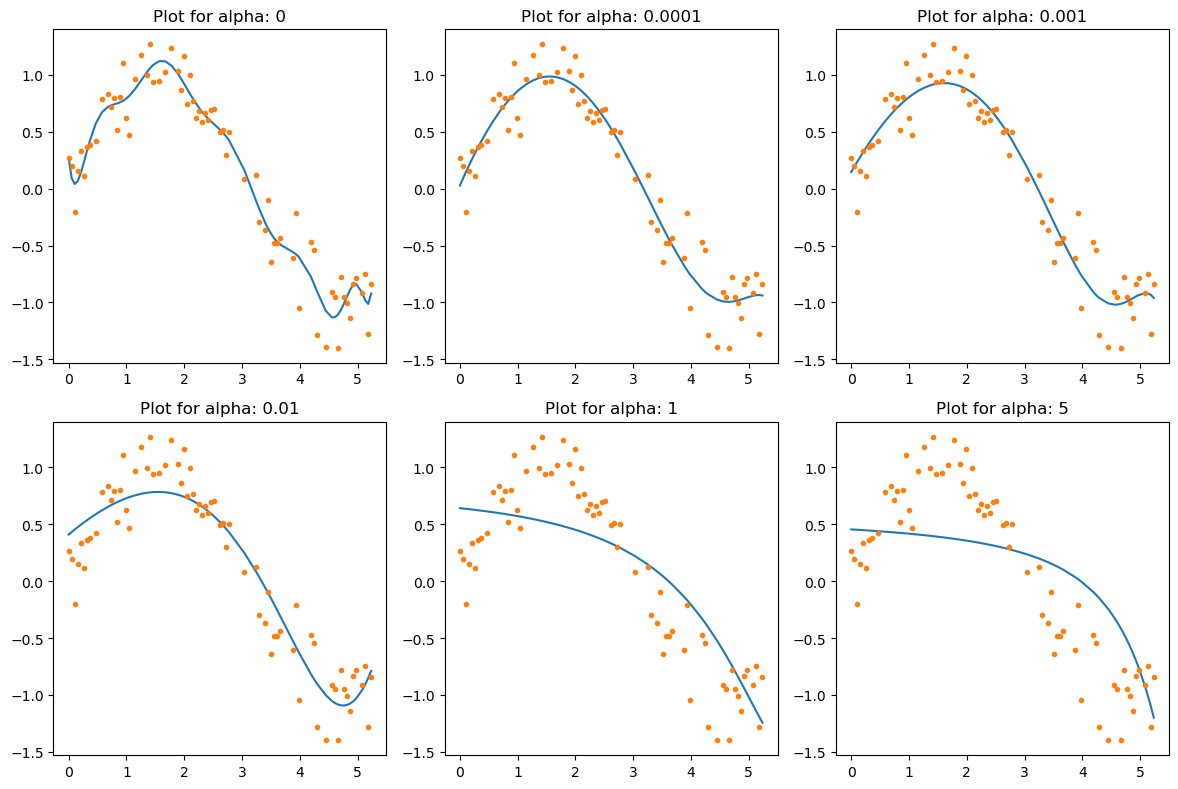

In [39]:
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [40]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.032,0.33,0.27,-5,35,-92,1.5e+02,-2.1e+02,2.3e+02,-1.9e+02,1.2e+02,-52,16,-3.4,0.49,-0.047,0.0026,-6.3e-05
alpha_1e-08,0.037,0.078,0.077,0.67,0.5,-0.45,0.079,-0.0075,0.00052,0.00049,3.9e-05,-1.7e-05,-5.7e-06,-6.6e-07,9.1e-08,5.5e-08,8.3e-09,-2.2e-09
alpha_0.0001,0.039,0.036,0.028,1.2,-0.3,-0.036,0.00021,0.00073,0.00015,2e-05,1.5e-06,-5.8e-08,-4.7e-08,-1e-08,-1.5e-09,-1.3e-10,-3e-12,-2.1e-13
alpha_0.001,0.041,0.042,0.15,0.89,-0.2,-0.029,-0.002,0.00013,7.7e-05,1.8e-05,3.2e-06,4.8e-07,6e-08,5e-09,-2.4e-10,-2.6e-10,-8.8e-11,-2.4e-11
alpha_0.01,0.063,0.062,0.41,0.43,-0.086,-0.017,-0.0021,-0.00015,7.9e-06,6.3e-06,1.7e-06,3.4e-07,6e-08,8.9e-09,9.7e-10,1.3e-11,-3.5e-11,-1.4e-11
alpha_1,0.17,0.19,0.64,-0.053,-0.013,-0.0025,-0.00042,-6.8e-05,-1e-05,-1.5e-06,-2.1e-07,-2.5e-08,-2.2e-09,2.3e-11,8.2e-11,2.9e-11,7.9e-12,1.9e-12
alpha_5,0.25,0.31,0.45,-0.03,-0.0062,-0.0012,-0.00021,-3.7e-05,-6.4e-06,-1.1e-06,-1.9e-07,-3.3e-08,-5.7e-09,-9.7e-10,-1.7e-10,-2.8e-11,-4.7e-12,-7.9e-13
alpha_10,0.3,0.35,0.37,-0.02,-0.0041,-0.00079,-0.00015,-2.7e-05,-4.8e-06,-8.7e-07,-1.6e-07,-2.9e-08,-5.2e-09,-9.4e-10,-1.7e-10,-3.1e-11,-5.6e-12,-1e-12
alpha_20,0.37,0.4,0.29,-0.013,-0.0026,-0.0005,-9.5e-05,-1.8e-05,-3.3e-06,-6.1e-07,-1.1e-07,-2.1e-08,-3.9e-09,-7.3e-10,-1.3e-10,-2.5e-11,-4.6e-12,-8.6e-13
alpha_25,0.39,0.42,0.27,-0.011,-0.0022,-0.00043,-8.2e-05,-1.5e-05,-2.9e-06,-5.3e-07,-1e-07,-1.9e-08,-3.5e-09,-6.4e-10,-1.2e-10,-2.2e-11,-4.2e-12,-7.8e-13


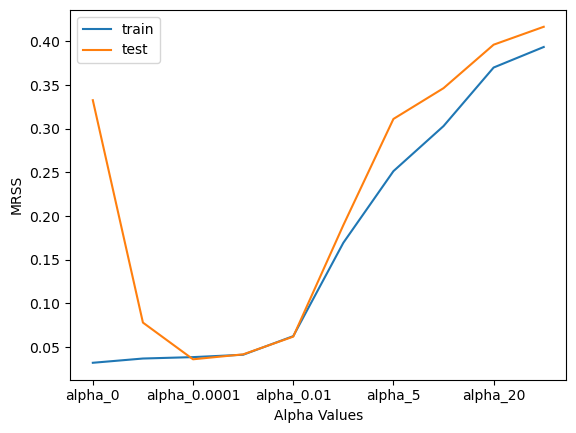

In [41]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test']);

In [42]:
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.032,0.33,0.27,-5,35,-92,1.5e+02,-2.1e+02,2.3e+02,-1.9e+02,1.2e+02,-52,16,-3.4,0.49,-0.047,0.0026,-6.3e-05
alpha_1e-10,0.039,0.037,-0.012,1.3,-0.42,-0.012,0.0018,0.00046,7.4e-05,1e-05,1.3e-06,1.3e-07,9.6e-09,-5.5e-10,-4.7e-10,-1.5e-10,-3.8e-11,-9e-12
alpha_1e-08,0.039,0.037,-0.012,1.3,-0.42,-0.012,0.0017,0.00046,7.4e-05,1e-05,1.3e-06,1.3e-07,9.6e-09,-5.5e-10,-4.7e-10,-1.5e-10,-3.8e-11,-9e-12
alpha_1e-05,0.039,0.037,-0.0043,1.3,-0.41,-0.011,0.0013,0.00048,7.7e-05,1e-05,1.2e-06,1.1e-07,4e-09,0,0,-8.1e-11,-4.7e-11,-1.1e-11
alpha_0.0001,0.039,0.037,0.054,1.2,-0.38,-0.0052,-0,0.00014,0.00012,1.3e-05,9.7e-07,0,0,0,-0,-0,-0,-1.5e-11
alpha_0.001,0.069,0.071,0.44,0.43,-0.12,-0.015,-0,-0,0,0,0,0,9e-08,6.4e-09,0,0,0,0
alpha_0.01,0.15,0.15,0.68,-0,-0.038,-0.0059,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0
alpha_1,0.59,0.64,0.12,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.59,0.64,0.12,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.59,0.64,0.12,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


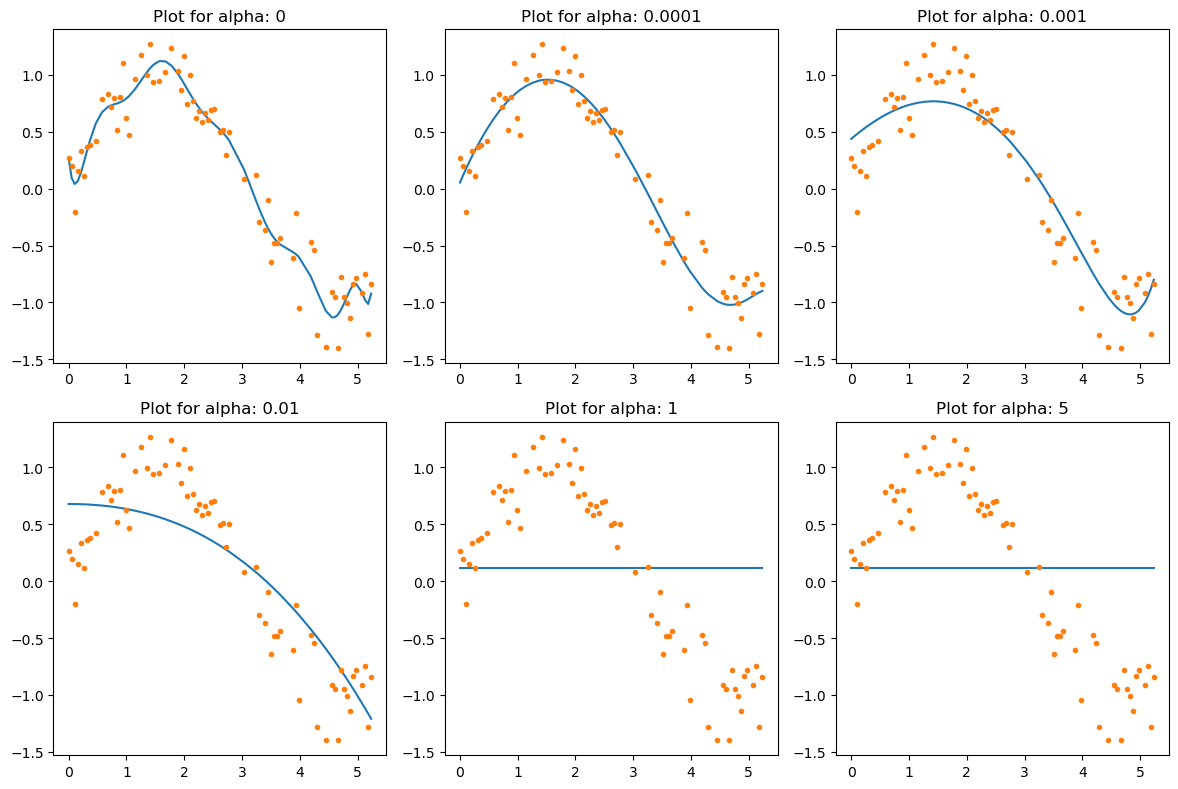

In [43]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression(normalize=True)
        lassoreg.fit(train_x, train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
        
    else:
        lassoreg = Lasso(alpha=alpha,normalize=True)
        lassoreg.fit(train_x,train_y)
        train_y_pred = lassoreg.predict(train_x)
        test_y_pred = lassoreg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    
    return ret
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

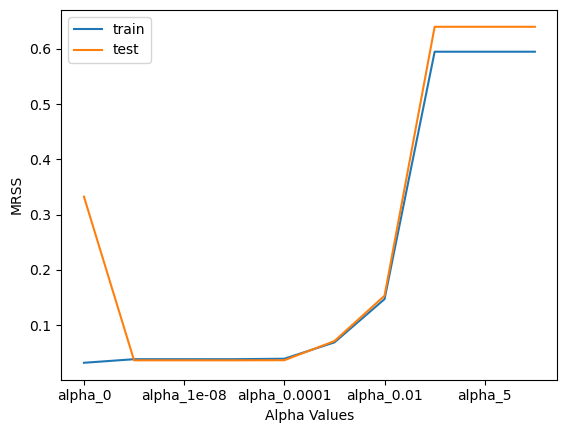

In [44]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test']);